<a href="https://colab.research.google.com/github/JUSTYNAYANG/Python/blob/main/20221102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 27.0 MB/s 
     |████████████████████████████████| 212 kB 66.6 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 106 kB 69.6 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 2.3 MB 59.5 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 272 kB 66.5 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 3.0 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 856 kB 65.7 MB/s 
     |████████████████████████████████| 593 kB 6

In [2]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 28 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=59f580db2145a152afe5f41f416ce2f13b8464eb49e0a94f4c136d6e2f1ede24
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
from PIL import Image

# Collecting Images

In [4]:
def collect(img_name, image):
  image.save(img_name+'.jpg')
  return image.convert("L")

In [5]:
import gradio as gr

In [6]:
gr.Interface(collect, ['text','pil'], "pil").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://176845425af78c0d.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fa4b5bd1cd0>,
 'http://127.0.0.1:7860/',
 'https://176845425af78c0d.gradio.app')

# getting the image

In [7]:
import glob

In [13]:
# * means all
# basically return all files with .jpg
filenames = glob.glob("*.jpg")

In [14]:
filenames

['zendaya.jpg', 'stephen curry.jpg', 'elon musk.jpg', 'queen elizabeth.jpg']

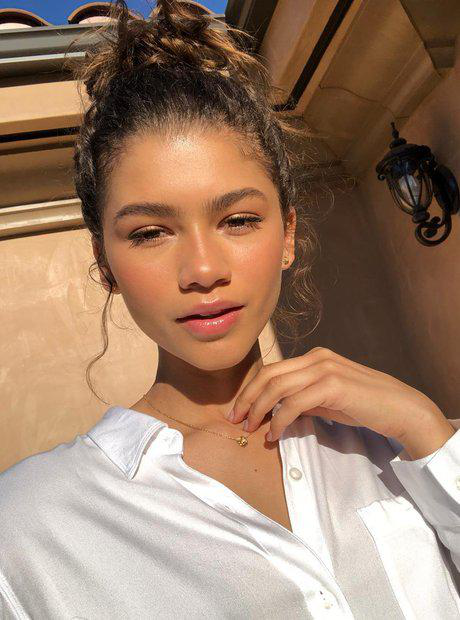

In [15]:
Image.open(filenames[0])

# recognizing faces


In [16]:
import face_recognition

In [19]:
known_faces = []
for filename in filenames:
  face = face_recognition.load_image_file(filename)
  face_encoding = face_recognition.face_encodings(face)[0]
  known_faces.append(face_encoding)

# comparing faces

In [23]:
zendaya = face_recognition.load_image_file("zendayaaaa.jpg")
zendaya_encoding = face_recognition.face_encodings(zendaya)[0]

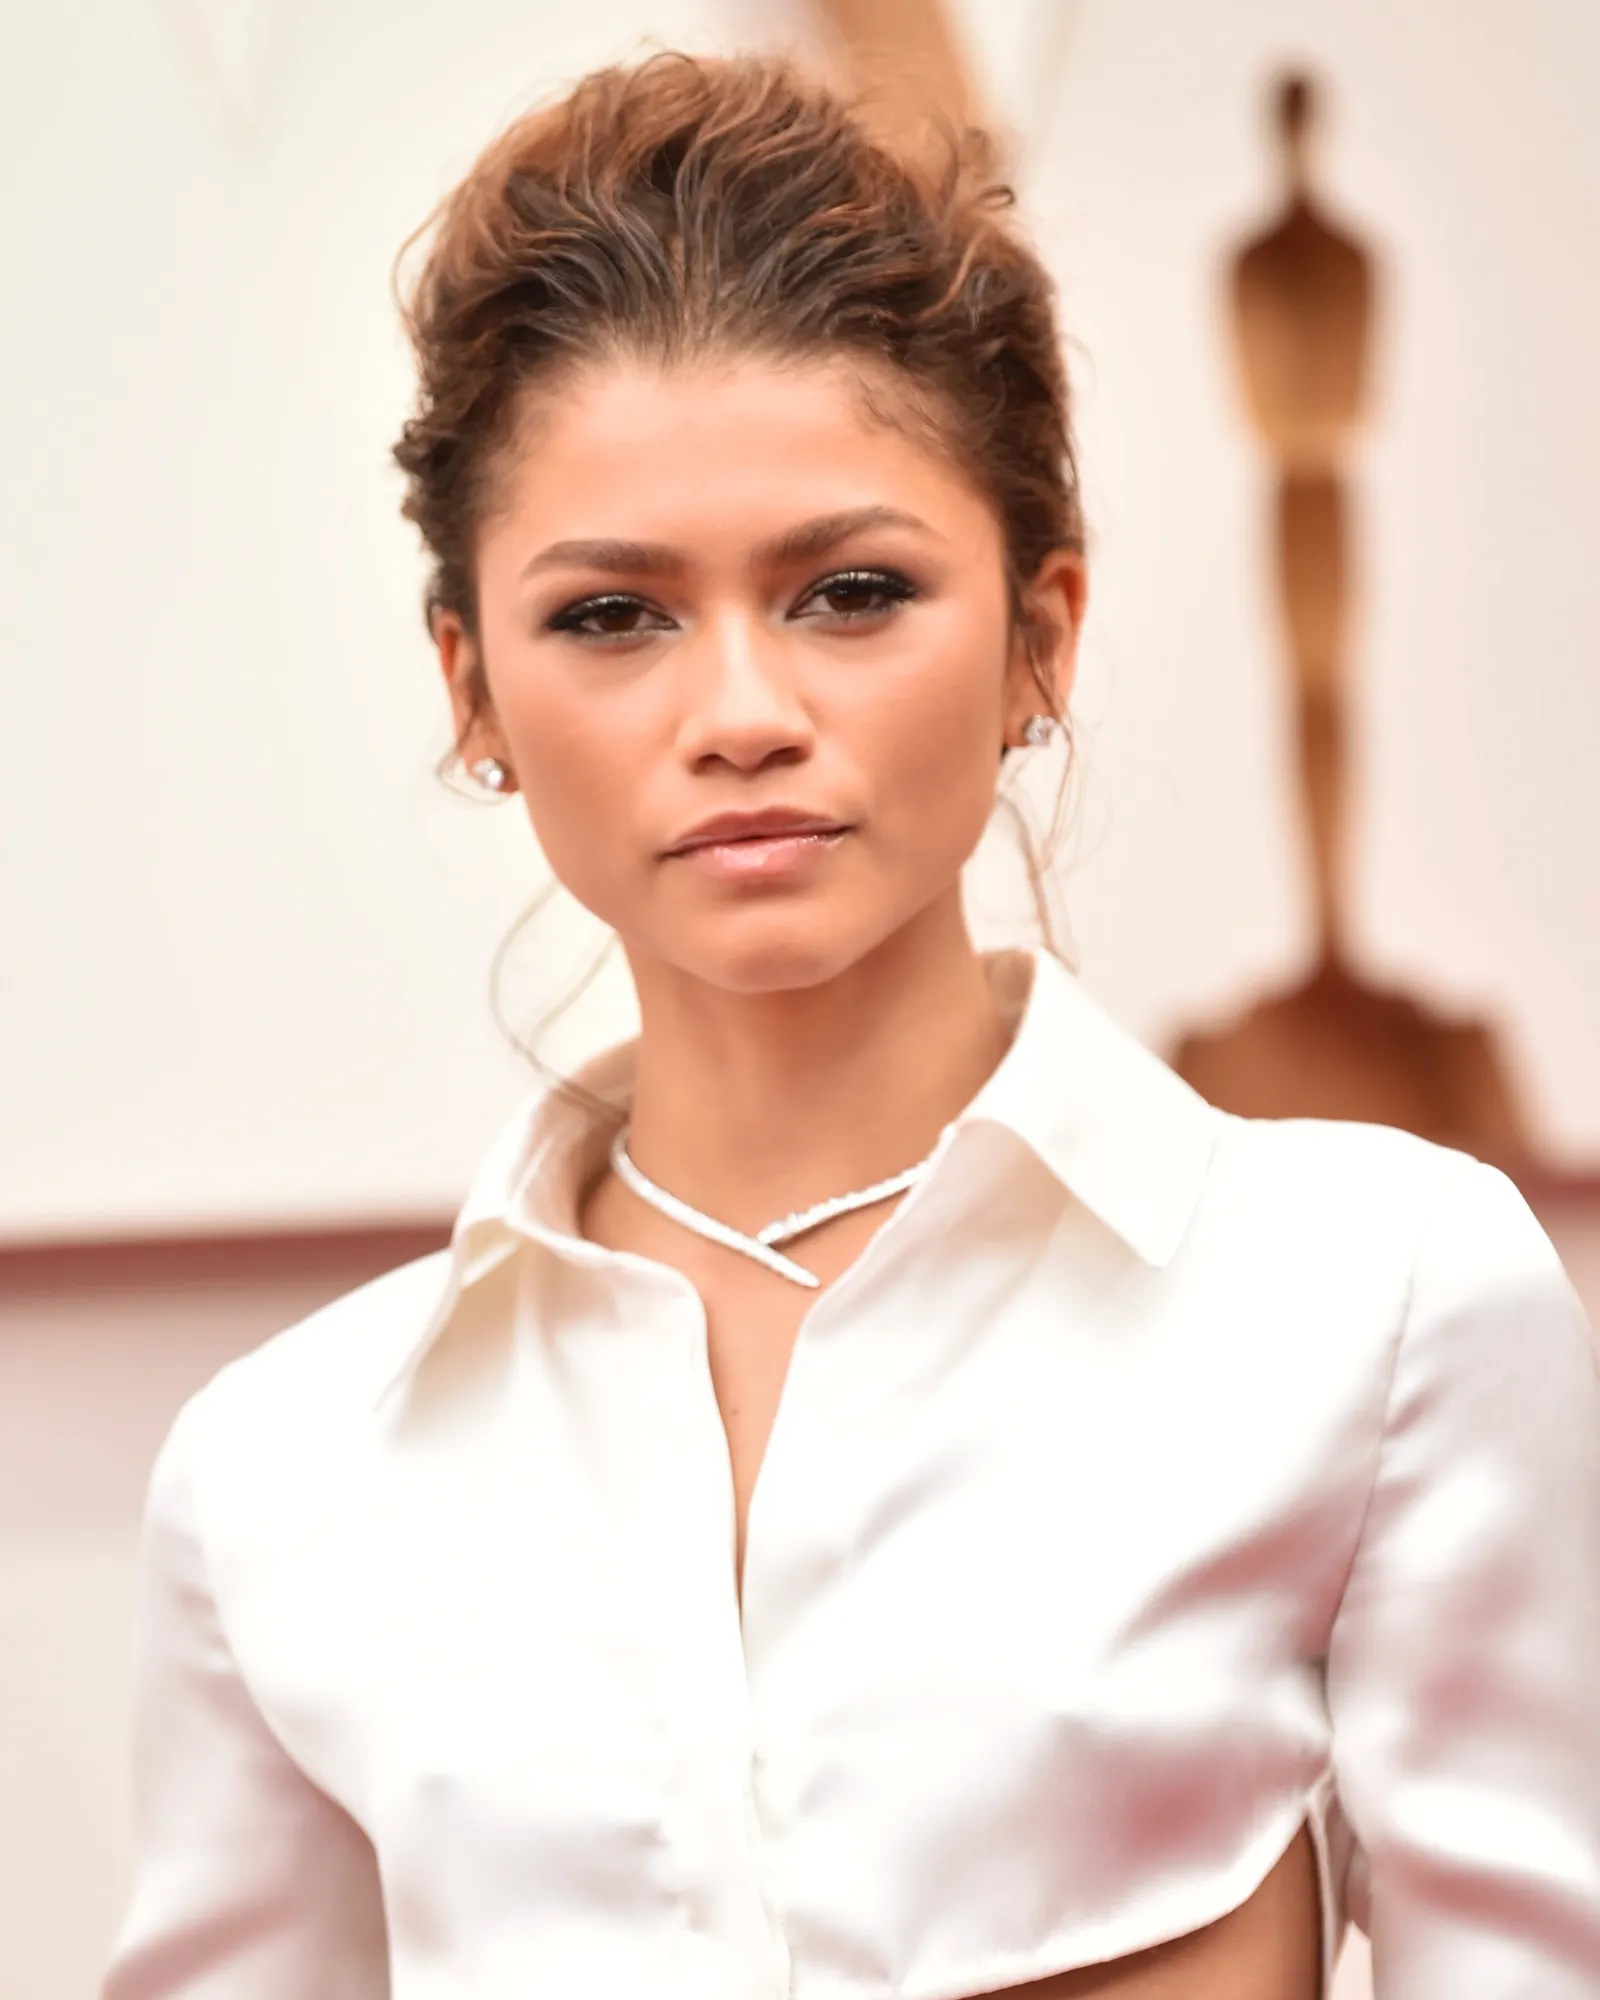

In [27]:
Image.open("zendayaaaa.jpg")

In [24]:
face_recognition.compare_faces(known_faces, zendaya_encoding)

[True, False, False, False]

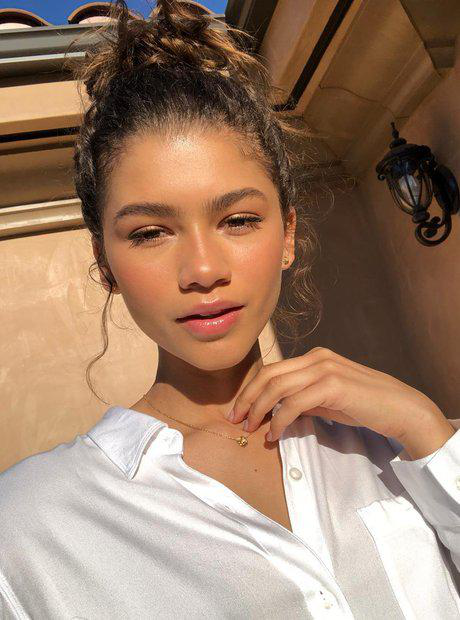

In [26]:
Image.open(filenames[0])

In [35]:
# from face.recognition.api import face_distance

import numpy as np
def recognize(image):
  encoding = face_recognition.face_encodings(image)[0]
  face_distances = face_recognition.face_distance(known_faces, encoding)
  # index = face_distances.index(min(face_distances))
  index = np.argmin(face_distances)
  return Image.open(filenames[index])

In [36]:
gr.Interface(recognize, "image", "pil").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://a33cafd7a0b88251.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fa416028050>,
 'http://127.0.0.1:7864/',
 'https://a33cafd7a0b88251.gradio.app')

# Explain

In [37]:
x = []

In [38]:
for i in range(10):
  x.append(i**2 + 1)

In [39]:
x

[1, 2, 5, 10, 17, 26, 37, 50, 65, 82]

In [40]:
import random

In [41]:
random.shuffle(x)

In [45]:
x

[5, 17, 82, 1, 65, 50, 2, 37, 10, 26]

In [44]:
x.index(min(x))

3